In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/manual temp.csv',index_col='DATE',parse_dates=True)

In [ ]:

df=df.dropna()
print('shape of data',df.shape)




shape of data (1821, 5)


In [ ]:
df.head(5)

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
01-01-2014,33.0,46.0,40.0,657,1756
01-02-2014,35.0,50.0,43.0,657,1756
01-03-2014,36.0,45.0,41.0,657,1757
01-04-2014,32.0,41.0,37.0,658,1757
01-05-2014,24.0,38.0,31.0,658,1758


<Axes: xlabel='DATE'>

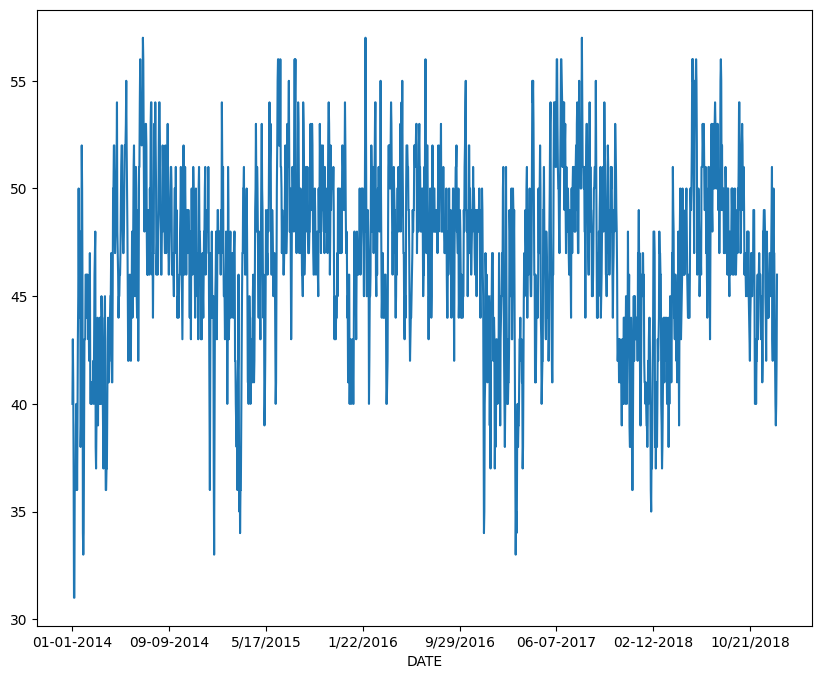

In [ ]:
df['AvgTemp'].plot(figsize=(10,8))


In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print("1.ADF:",dftest[0])
  print("2.P-Value:",dftest[1])
  print("3.Num of Lags:",dftest[2])
  print("4.Num of observation used for ADF Regression and Critical Value Calculation:",dftest[3])
  print("5.Critical values:")
  for key ,val  in dftest[4].items():
    print("\t",key,":",val)

In [ ]:
ad_test(df['AvgTemp'])

1.ADF: -6.554680125068777
2.P-Value: 8.675937480199653e-09
3.Num of Lags: 12
4.Num of observation used for ADF Regression and Critical Value Calculation: 1808
5.Critical values:
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


FIGURE OUT ORDER OF ARIMA MODEL

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=3.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=4.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=3.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=4.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=5.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=4.73 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=4.64 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=6.81 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=5.77 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=5.50 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Tue, 30 Apr 2024   AIC                           8295.034
Time:                        07:17:02   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pip install --upgrade statsmodels


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
print(df.shape)

(1821, 5)


In [ ]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1791, 5) (30, 5)


TRAIN THE MODEL

In [ ]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Tue, 30 Apr 2024   AIC                           8156.395
Time:                        08:41:02   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAKE PREDICTIONS ON TEST SET

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933418
1803    45.942808
1804    45.952063
1805    45.961185
1806    45.970175
1807    45.979036
1808    45.987769
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045481
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075922
1820    46.083261
Name: predicted_mean, dtype: float64


<Axes: xlabel='DATE'>

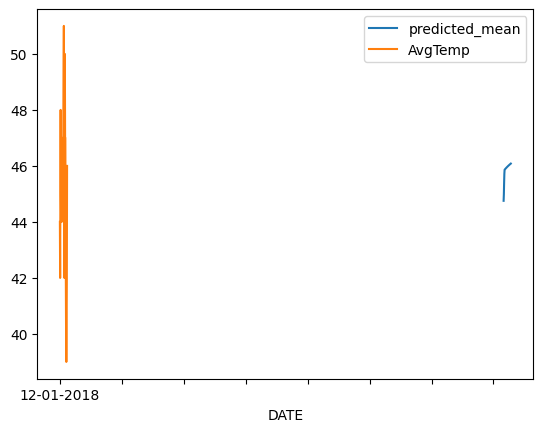

In [ ]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
test['AvgTemp'].mean()

45.0

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463825206671


In [ ]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
12/26/2018,35.0,45.0,40.0,654,1752
12/27/2018,33.0,44.0,39.0,655,1752
12/28/2018,33.0,47.0,40.0,655,1753
12/29/2018,36.0,47.0,42.0,655,1753
12/30/2018,39.0,52.0,46.0,656,1754


FOR FUTURE DATES





In [ ]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
pred=model2.predict(start=len(df),end=len(df)+30,type='levels').rename('ARIMA PREDICTIONS')

pred.index=index_future_dates
print(pred)

1821    46.418166
1822    46.113912
1823    45.617874
1824    45.249566
1825    45.116916
1826    45.136666
1827    45.156140
1828    45.175341
1829    45.194274
1830    45.212942
1831    45.231349
1832    45.249498
1833    45.267394
1834    45.285038
1835    45.302436
1836    45.319591
1837    45.336505
1838    45.353183
1839    45.369628
1840    45.385842
1841    45.401830
1842    45.417593
1843    45.433137
1844    45.448462
1845    45.463574
1846    45.478474
1847    45.493165
1848    45.507651
1849    45.521934
1850    45.536017
1851    45.549904
Name: ARIMA PREDICTIONS, dtype: float64


<Axes: >

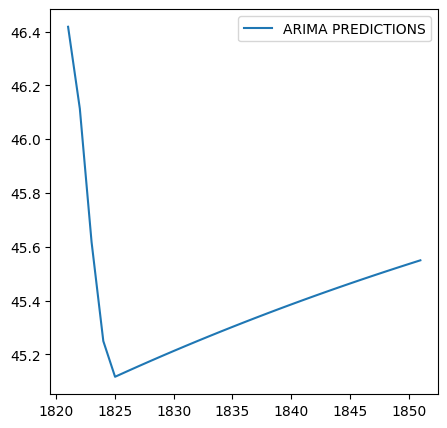

In [ ]:
pred.plot(figsize=(5,5),legend=True)